In [115]:
from urchin_workflow import urchin_supervised_preprocessing as usp, urchin_supervised_classification as usc
import pandas as pd

In [116]:
df=pd.read_csv("Data/4b.IBM_data_cleaned_dropped.csv")

In [117]:
df_aged=df[df['age']<58].copy()

In [118]:
print(len(df),len(df_aged))

1470 1441


In [119]:
df_new=usp.a_remove_outliers(df_aged)

Remove outliers
# rows before removal 1441
# rows after outliers removed 1427



In [120]:
y_name='attrition'
x_train, y_train, x_train_scaled, x_test_scaled, y_test, x_test=usp.e_prep_xy(df_new,y_name)

In [121]:
xysplit_list=usp.f_xysplit_compile(x_train_scaled, x_test_scaled, y_train, y_test)

In [122]:
df_new['attrition'].value_counts()

0    1195
1     232
Name: attrition, dtype: int64

In [123]:
#Get list of columns
col_list=[]
[col_list.append(True) if x[0:3]=='cat' else col_list.append(False) for x in x_train_scaled.columns ]
col_list

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [124]:
xysplit_list=usp.f_xysplit_compile(x_train_scaled, x_test_scaled, y_train, y_test)

x_train_res,y_train_res=usc.abb_conduct_smote_nc(xysplit_list,col_list)

In [125]:
x_train_res['cat__businesstravel_travel_frequently'].value_counts()

0.00    1415
1.00     273
Name: cat__businesstravel_travel_frequently, dtype: int64

In [126]:
xysplit_list=usp.f_xysplit_compile(x_train_res, x_test_scaled, y_train_res, y_test)

result=usc.ba_RFE_best_n(xysplit_list,silent=True)

In [127]:
result

,num_n,accuracy
9,9.00,0.81
8,8.00,0.80
6,6.00,0.79
7,7.00,0.79
4,4.00,0.76
5,5.00,0.76
3,3.00,0.74
2,2.00,0.71
1,1.00,0.65


In [128]:
rfe_mod,rfe_keep,rfe_remove=usc.bb_feature_selection_RFE(xysplit_list,n_features=9)


RFE suggests 32 be dropped
Features to drop using RFE: ['cat__businesstravel_travel_frequently', 'cat__businesstravel_travel_rarely', 'cat__department_research & development', 'cat__department_sales', 'cat__educationfield_life sciences', 'cat__educationfield_marketing', 'cat__educationfield_medical', 'cat__educationfield_other', 'cat__educationfield_technical degree', 'cat__gender_male', 'cat__jobrole_human resources', 'cat__jobrole_laboratory technician', 'cat__jobrole_manager', 'cat__jobrole_manufacturing director', 'cat__jobrole_research director', 'cat__jobrole_research scientist', 'cat__jobrole_sales executive', 'cat__jobrole_sales representative', 'cat__maritalstatus_married', 'cat__maritalstatus_single', 'num__education', 'num__environmentsatisfaction', 'num__jobinvolvement', 'num__jobsatisfaction', 'num__percentsalaryhike', 'num__performancerating', 'num__relationshipsatisfaction', 'num__totalworkingyears', 'num__trainingtimeslastyear', 'num__yearsincurrentrole', 'num__yearssi

In [129]:
len(y_train)

998

Minimum error:- 0.2703962703962704 at K = 1


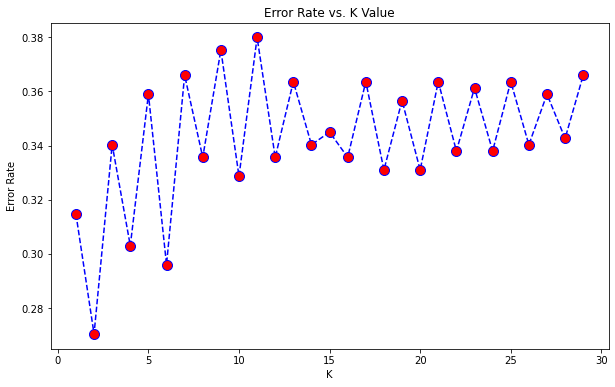

In [130]:
#x_train_res=x_train_res[rfe_keep]
#x_test_scaled=x_test_scaled[rfe_keep]
xysplit_list=usp.f_xysplit_compile(x_train_res, x_test_scaled, y_train_res, y_test)
usc.ca_check_knn_error_rate(xysplit_list)

Maximum accuracy:- 0.8076923076923077 at K = 20


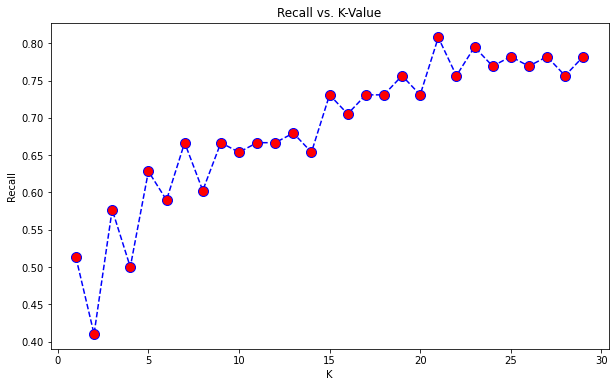

In [131]:
usc.cb_check_knn_performance_rate(xysplit_list,perf_type='Recall')

In [132]:
knn_mod,knn_err=usc.cc_conduct_knn(xysplit_list,n_neighbors=20)

In [133]:
knn_err

,Error_metric,Train,Test
0,Accuracy,0.83,0.67
1,Precision,0.76,0.32
2,Recall,0.97,0.73


Maximum accuracy:- 0.6666666666666666 at depth = 0


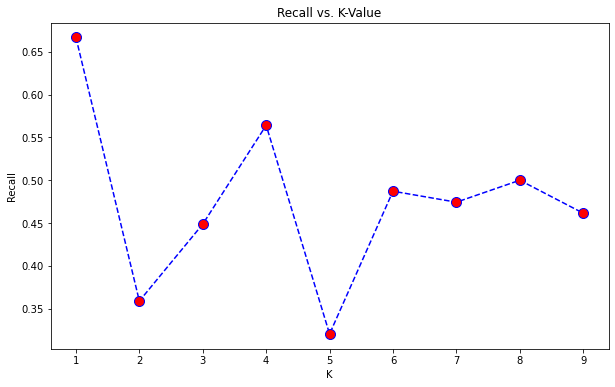

In [135]:
usc.da_check_dt_performance_rate(xysplit_list)

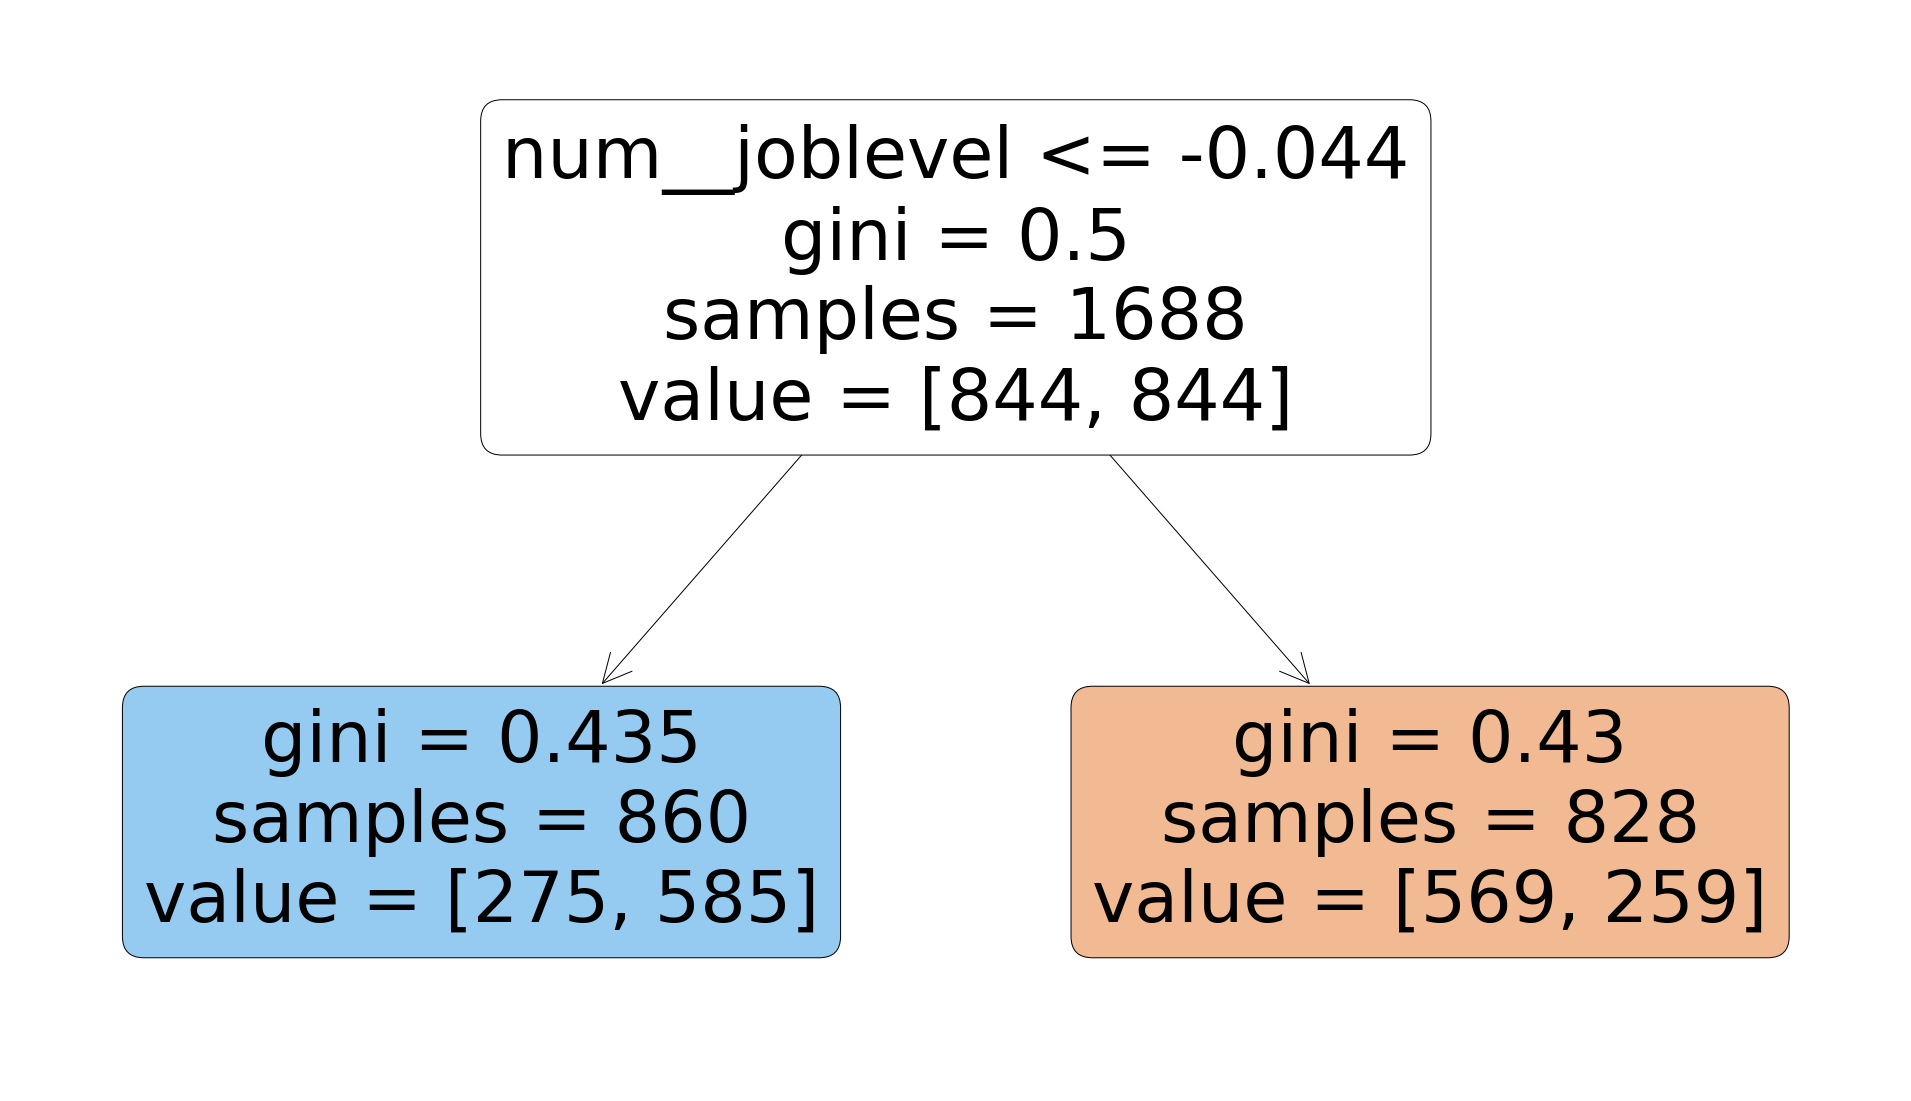

(DecisionTreeClassifier(max_depth=1),
   Error_metric  Train  Test
 0     Accuracy   0.68  0.66
 1    Precision   0.68  0.31
 2       Recall   0.69  0.67)

In [136]:
usc.db_conduct_decision_tree(xysplit_list,max_depth=1,show_plot=True)

In [137]:
best_fit=usc.ea_grid_search_rfc(xysplit_list)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [138]:
rfc_mod,rfc_err=usc.eb_random_forest_classifier(xysplit_list,best_fit)

In [139]:
rfc_err

,Error_metric,Train,Test
0,Accuracy,1.00,0.85
1,Precision,1.00,0.72
2,Recall,1.00,0.29
